In [3]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [4]:
# Load the Financial news dataset
news_data = pd.read_csv("../data/Raw_analyst_ratings.csv")

# View structure of the data
print(news_data.info())
print(news_data.head())

news_data = news_data.dropna(subset=['headline', 'stock'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://w

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64
Articles per Day:
publication_date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64


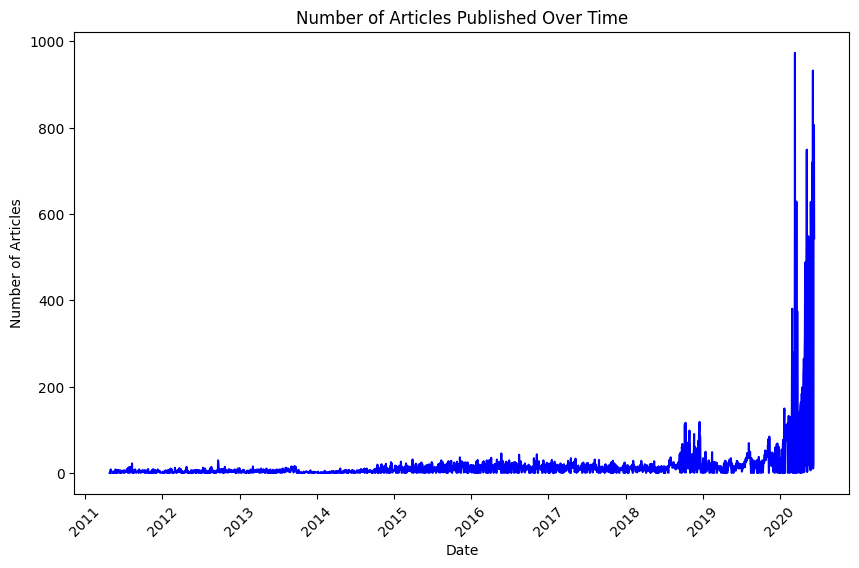

In [5]:
# Headline length
news_data['headline_length'] = news_data['headline'].apply(len)
print(news_data['headline_length'].describe())

# Articles per publisher
publisher_counts = news_data['publisher'].value_counts()
print("Articles per Publisher:")
print(publisher_counts)

# Assuming 'news_data' is already loaded with the necessary data

# Ensure the 'date' column is of datetime type
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')

# Check if the 'date' column has timezone information and remove it
if news_data['date'].dt.tz is not None:
    # Remove timezone information if it exists
    news_data['date'] = news_data['date'].dt.tz_localize(None)

# Extract the publication date without time for easier analysis
news_data['publication_date'] = news_data['date'].dt.date

# Count the number of articles published each day
articles_per_day = news_data['publication_date'].value_counts().sort_index()

print("Articles per Day:")
print(articles_per_day)

# Plot publication frequency over time
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='line', color='b')
plt.title("Number of Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Perform sentiment analysis
def categorize_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

news_data['sentiment_category'] = news_data['headline'].apply(categorize_sentiment)

# Display sentiment category counts
sentiment_counts = news_data['sentiment_category'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of Sentiment Categories")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.show()

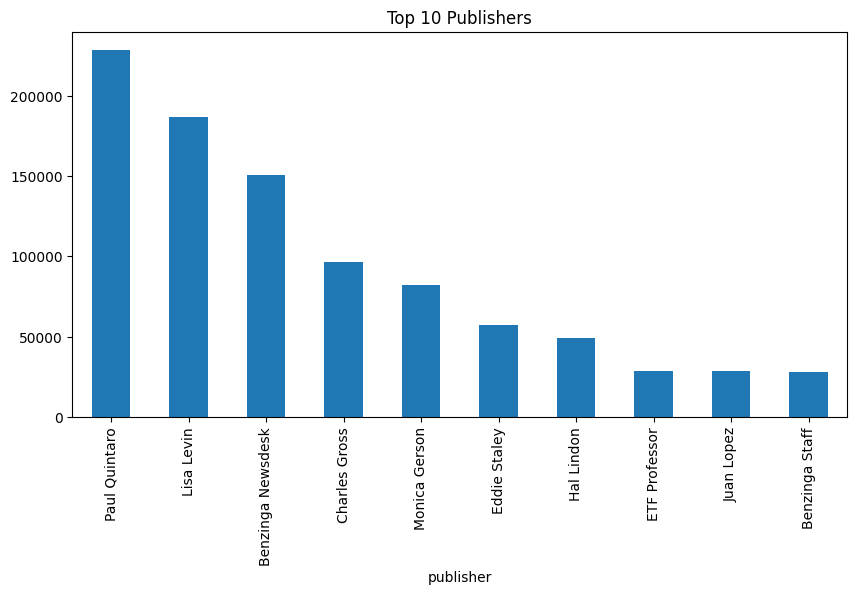

domain
Paul Quintaro            228373
Lisa Levin               186979
Benzinga Newsdesk        150484
Charles Gross             96732
Monica Gerson             82380
                          ...  
Fred Wilson                   1
Union Square Ventures         1
Sumit Mehta                   1
David Wenger                  1
ProactiveInvestors            1
Name: count, Length: 1024, dtype: int64


In [8]:
# Top publishers
top_publishers = news_data['publisher'].value_counts().head(10)
top_publishers.plot(kind='bar', title="Top 10 Publishers", figsize=(10, 5))
plt.show()

# Analyze domains if email addresses are used as publishers
news_data['domain'] = news_data['publisher'].str.split('@').str[-1]
domain_counts = news_data['domain'].value_counts()
print(domain_counts)
